# CODE EXAMPLE 7

#### purpose: Download Census data "states_48 dataset (shapefile)" (vector). Isolating a state. Creating a new shapefile for that shape, saving it, displaying it. Reprojecting that state shapefile to a UTM projection suitable for that state. Displaying the reprojected state layer and save to a new shapefile.

#### By: James Whyte


In [1]:
# Import necessary modules
import geopandas as gpd

# Setting filepath to grab the shapefile of states_48.shp
fp = r"C:\Users\new\Desktop\states_48.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)
# Calling heat on the data to see the attribute table in order to figure out what to query
data.head()

,AREA,PERIMETER,STATESP010,STATE,STATE_FIPS,ORDER_ADM,MONTH_ADM,DAY_ADM,YEAR_ADM,geometry
0,12.879,21.642,1.0,Alabama,01,22.0,December,14.0,1819.0,(POLYGON ((-88.08472353499985 30.2132621780000...
1,13.586,21.737,5.0,Arkansas,05,25.0,June,15.0,1836.0,POLYGON ((-94.29158997399986 36.49929244500009...
2,28.919,23.890,4.0,Arizona,04,48.0,February,14.0,1912.0,POLYGON ((-110.4938100619999 37.00376728200013...
3,41.613,55.323,6.0,California,06,31.0,September,9.0,1850.0,(POLYGON ((-117.1045679089999 32.6128695810001...
4,28.039,22.017,8.0,Colorado,08,38.0,August,1.0,1876.0,POLYGON ((-106.3755715069999 41.00071447800002...


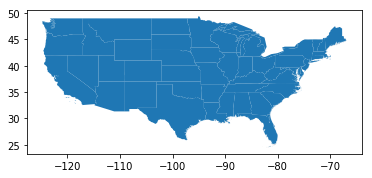

In [3]:
# plotting the shapefile to see what it looks like
data.plot()

In [4]:
# checking it's coordinate reference system
data.crs

{'init': 'epsg:4269'}

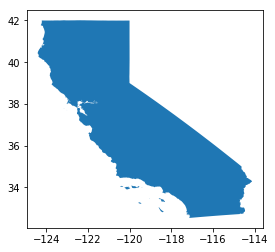

In [5]:
# creating a path to store my new state shapefile
out_path = r"C:\Users\new\Desktop\California_state.shp"

# selecting the state California by using GeoPandas query statement
selection = data[data['STATE'] == 'California']

# displaying the state query
selection.plot()

# Saving the state query
selection.to_file(driver = 'ESRI Shapefile', filename = out_path)

In [6]:
# Now grabbing that shapefile I just made
fp2 =  "selection_state.shp"

# Turning that shapefile into a GeoDataFrame object
data2 = gpd.read_file(fp2)
# Calling head() on that now GeoDataFram object to check its attribute table
data2.head()

,AREA,PERIMETER,STATESP010,STATE,STATE_FIPS,ORDER_ADM,MONTH_ADM,DAY_ADM,YEAR_ADM,geometry
0,41.613,55.323,6.0,California,06,31.0,September,9.0,1850.0,(POLYGON ((-117.1045679089999 32.6128695810001...


In [7]:
# Checking the coordinate refernce system of the shapefile I made. It is in epsg:4369
data2.crs

{'init': 'epsg:4269'}

In [8]:
# creating a new path to store my state query shapefile reprojected
reproj_out_path = r"C:\Users\new\Desktop\California_state_reprojected.shp"

# selecting the state California by using GeoPandas query statement
cali = data[data['STATE'] == 'California']

In [9]:
# checking its current projection
cali.crs

{'init': 'epsg:4269'}

In [10]:
# reprojecting california into UTM-10 (epsg:3395)
cali = cali.to_crs({'init': 'epsg:3395'})

In [11]:
# check to see that the crs has been changed to epsg:3395
cali.crs

{'init': 'epsg:3395'}

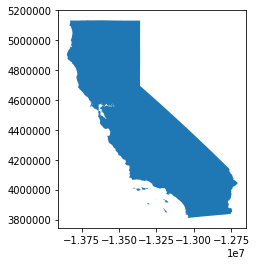

In [12]:
# displaying the reprojected state layer
cali.plot()

In [13]:
# Saving the new shapefile
cali.to_file(driver = 'ESRI Shapefile', filename = reproj_out_path)

out_meta.update({"driver": "GTiff",
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform})
nlcd_l2(out_image <--your copy!)